In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# The path to our CSV file
file = "AB_NYC_2019_clean.csv"

# Read file data into pandas
NYC_2019 = pd.read_csv(file, index_col=0)
NYC_2019

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [4]:
#descriptive data by neighbourhood 
mean = NYC_2019.groupby('neighbourhood')['number_of_reviews'].mean()
median = NYC_2019.groupby('neighbourhood')['number_of_reviews'].median()
total = NYC_2019.groupby('neighbourhood')['number_of_reviews'].sum()


summ_stats = pd.DataFrame ({"Mean Number of Reviews": mean, "Median Number of Reviews":median, 
                            "Number of Reviews":total})
summ_stats


,Mean Number of Reviews,Median Number of Reviews,Number of Reviews
neighbourhood,,,
Allerton,42.928571,27.0,1803
Arden Heights,7.750000,5.0,31
Arrochar,14.619048,11.0,307
Arverne,29.259740,15.0,2253
Astoria,21.455556,5.0,19310
...,...,...,...
Windsor Terrace,27.541401,7.0,4324
Woodhaven,31.727273,8.0,2792
Woodlawn,44.000000,7.0,484


In [5]:
#Groupby Burrough 
mean = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].mean()
median = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].median()
total = NYC_2019.groupby('neighbourhood_group')['number_of_reviews'].sum()


summ_stats2 = pd.DataFrame ({"Mean Number of Reviews": mean, "Median Number of Reviews":median, 
                            "Number of Reviews":total})
summ_stats2


,Mean Number of Reviews,Median Number of Reviews,Number of Reviews
neighbourhood_group,,,
Bronx,26.004583,9,28371
Brooklyn,24.202845,6,486574
Manhattan,20.985596,4,454569
Queens,27.700318,7,156950
Staten Island,30.941019,12,11541


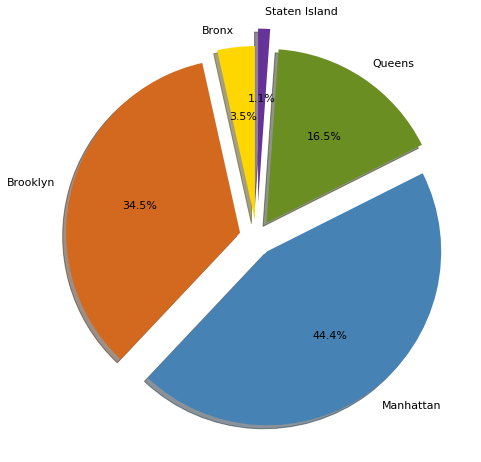

In [11]:
# Generate a pie plot showing the distribution of neighbourhoods by bourough 
Hood_df=pd.DataFrame(NYC_2019.groupby(['neighbourhood_group']).sum())
#Hood_df.head()
explodeTuple = (0.1, 0.1, 0.1, 0.1, 0.2)
colors= ['gold', 'chocolate', 'steelblue', 'olivedrab', 'rebeccapurple']
Hood_df.plot.pie(y='host_id', autopct='%1.1f%%', explode=explodeTuple, startangle = 90, legend=False, 
                 shadow=True, figsize=(8,8), fontsize=11, colors=colors)
plt.title= ("Burrough Distribution")
plt.ylabel("")
plt.savefig("Distribution of properties by bourough")

In [12]:
#Generate seperate Data frames of each burrough
brooklyn_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Brooklyn")]
manhattan_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Manhattan")]
queens_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Queens")]
staten_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Staten Island")]
bronx_df =NYC_2019.loc[(NYC_2019["neighbourhood_group"]== "Bronx")]
#bronx_df.head()

In [13]:
#brooklyn_df.head()

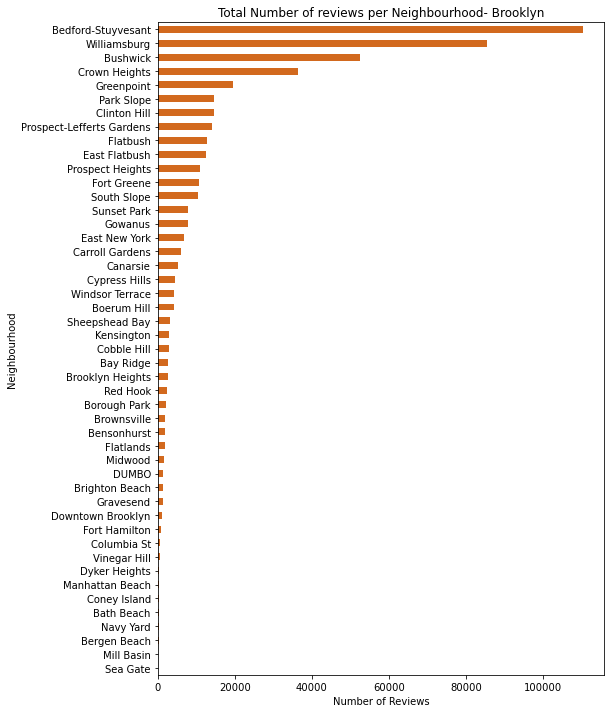

In [14]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(brooklyn_df.groupby(['neighbourhood']).sum()).reset_index()
brook_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = brook_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Brooklyn',figsize=(8,12),
                legend = False, color='chocolate')
plt.ylabel('Neighbourhood')
plt.xlabel("Number of Reviews")
plt.savefig("Brooklyn_Reviews_by_Neighborhood.png")

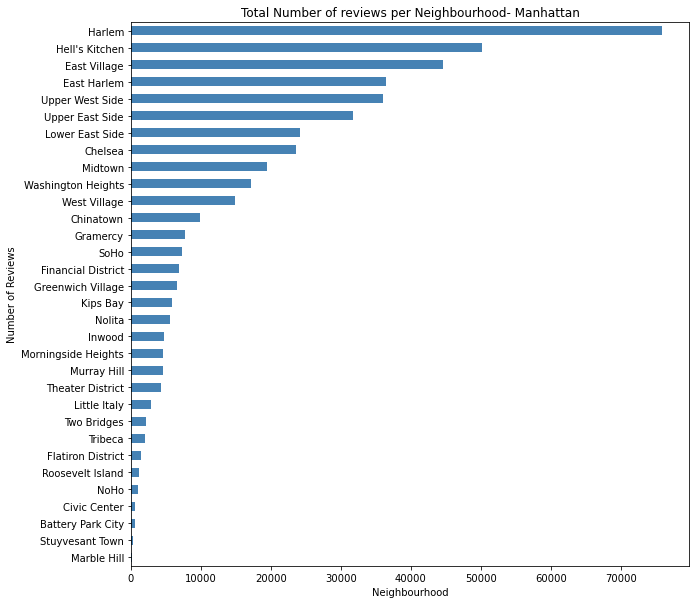

In [15]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(manhattan_df.groupby(['neighbourhood']).sum()).reset_index()
manhat_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = manhat_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Manhattan', 
                    legend = False, figsize=(10,10), color='steelblue')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Manhattan_Reviews_by_Neighborhood.png")

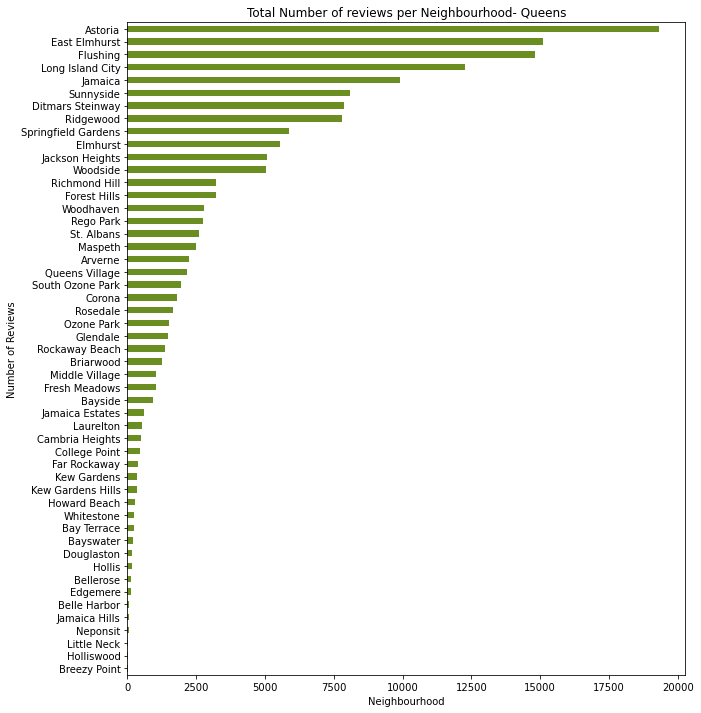

In [16]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(queens_df.groupby(['neighbourhood']).sum()).reset_index()
queens_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = queens_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Queens', 
                    legend = False, figsize=(10,12), color='olivedrab')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Queens_Reviews_by_Neighborhood.png")

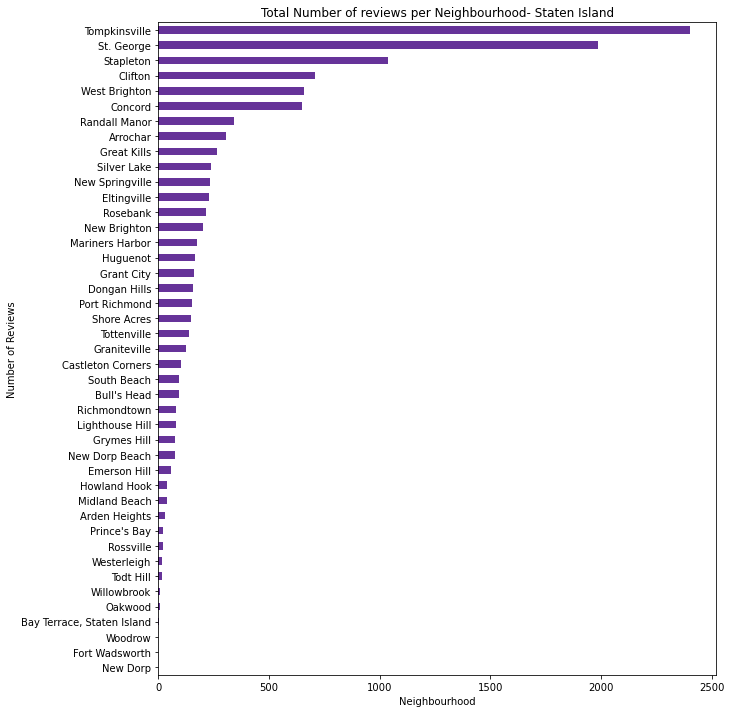

In [17]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(staten_df.groupby(['neighbourhood']).sum()).reset_index()
staten_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = staten_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Staten Island', 
                    legend = False, figsize=(10,12), color='rebeccapurple')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Staten_Island_Reviews_by_Neighborhood.png")

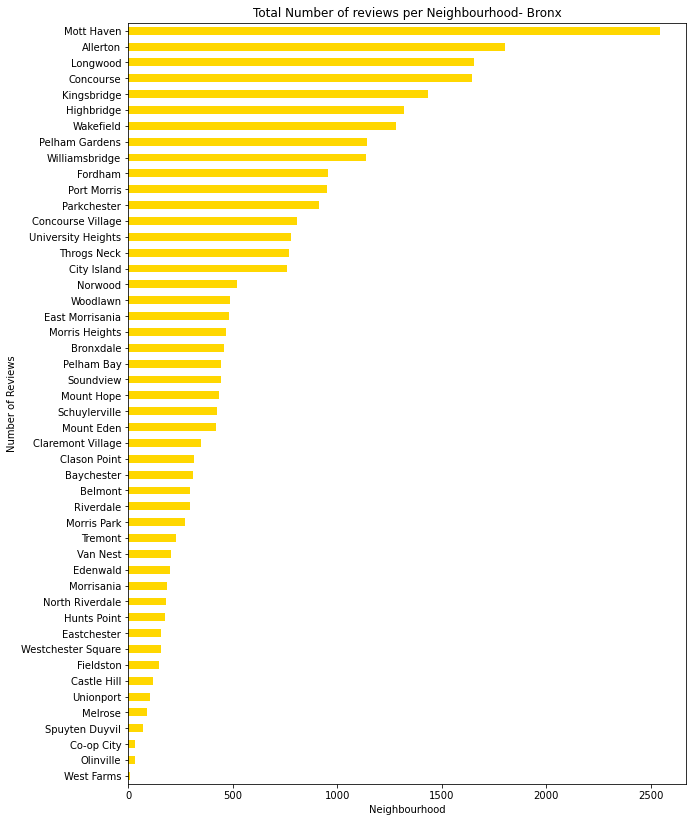

In [18]:
# Generate a bar plot showing the total number of reviews for all neighbourhoods for each bourough
pd_bar_plot= pd.DataFrame(bronx_df.groupby(['neighbourhood']).sum()).reset_index()
bronx_sorted_desc= pd_bar_plot.sort_values('number_of_reviews',ascending=True)
pd_barplot = bronx_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="barh", x='neighbourhood', title = 'Total Number of reviews per Neighbourhood- Bronx', 
                    legend = False, figsize=(10,14), color='gold')
plt.xlabel('Neighbourhood')
plt.ylabel("Number of Reviews")
plt.savefig("Bronx_Reviews_by_Neighborhood.png")

In [14]:
mean = NYC_2019.groupby('neighbourhood_group')['price'].mean()
median = NYC_2019.groupby('neighbourhood_group')['price'].median()
summ_stats3 = pd.DataFrame ({"Mean Price": mean, "Median Price":median})
summ_stats3

,Mean Price,Median Price
neighbourhood_group,,
Bronx,87.496792,65
Brooklyn,124.383207,90
Manhattan,196.875814,150
Queens,99.517649,75
Staten Island,114.812332,75


In [30]:
#prop_rev_total=brooklyn_df.groupby('id')["number_of_reviews"].sum()
prop_rev_total2=brooklyn_df.groupby('id')["number_of_reviews"].mean()
print(sorted(prop_rev_total2))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
prop_rev_total2=manhattan_df.groupby('id')["number_of_reviews"].sum()
print(sorted(prop_rev_total2))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
#Top 10 reviewed brooklyn properties
top_brooklyn=brooklyn_df.loc[(brooklyn_df["number_of_reviews"]>375)]
top_brooklyn

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
113,26785,42273,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,467,4.22,2,192
137,31994,137814,Brooklyn,Clinton Hill,40.68730,-73.96340,Private room,76,2,426,3.89,3,275
320,76761,118971,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,3.97,3,182
451,158955,465589,Brooklyn,Williamsburg,40.70867,-73.94284,Entire home/apt,139,2,385,4.00,1,222
471,166172,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
534,195233,949221,Brooklyn,Prospect-Lefferts Gardens,40.65513,-73.95641,Private room,43,1,401,6.62,2,43
1547,699472,3587751,Brooklyn,Williamsburg,40.70995,-73.95536,Entire home/apt,220,1,404,4.90,2,341
4870,3474320,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
8352,6422875,33510832,Brooklyn,Bedford-Stuyvesant,40.69271,-73.94353,Private room,70,1,397,7.97,2,35
15549,12502633,379619,Brooklyn,Gowanus,40.66700,-73.99233,Entire home/apt,100,1,378,9.67,1,48


In [40]:
#Store latitude and longitude into locations
import gmaps
import requests
import time

location_brooklyn = top_brooklyn[["latitude","longitude"]].astype(float)

fig_brook= gmaps.figure()
heat_layer = gmaps.heatmap_layer(location_brooklyn, weights= top_brooklyn.number_of_reviews,
                                 dissipating=False, max_intensity=100, point_radius=.001)
fig_brook.add_layer(heat_layer)
fig_brook


Figure(layout=FigureLayout(height='420px'))

<AxesSubplot:title={'center':'Top ten Reviewed properties in Brooklyn'}, xlabel='neighbourhood'>

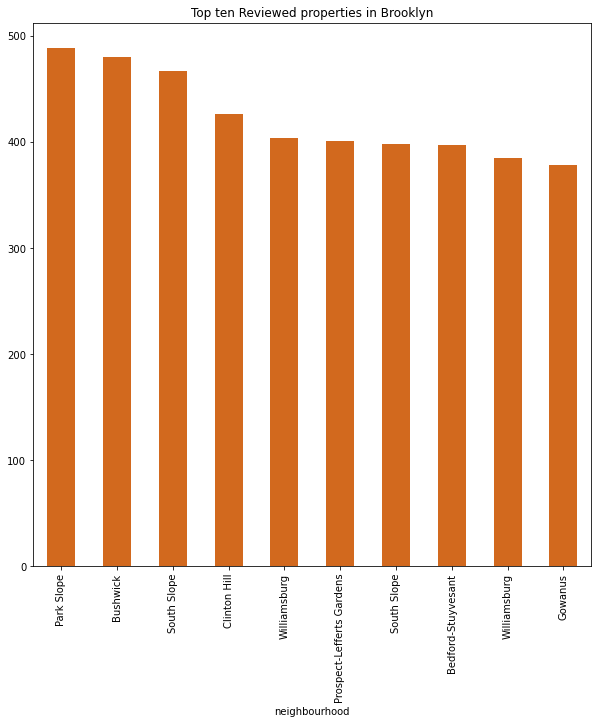

In [43]:
brooklyn10_sorted_desc= top_brooklyn.sort_values('number_of_reviews',ascending=False)
pd_barplot = brooklyn10_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="bar", x='neighbourhood', title = 'Top ten Reviewed properties in Brooklyn', 
                    legend = False, figsize=(10,10), color='chocolate')

In [35]:
#Top 10 reviewed Manhattan properties
top_manhattan=manhattan_df.loc[(manhattan_df["number_of_reviews"]>410)]
top_manhattan

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
225,58059,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,458,4.58,2,258
1125,476983,277379,Manhattan,Harlem,40.82537,-73.94392,Private room,85,1,439,5.12,2,238
1190,506121,2267153,Manhattan,East Village,40.72760,-73.98347,Private room,72,5,451,5.26,2,13
1879,834190,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
2015,891117,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
2030,903947,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2031,903972,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2092,945297,5074654,Manhattan,East Village,40.72836,-73.98163,Private room,100,1,414,5.39,2,231
2163,999248,273174,Manhattan,Tribeca,40.71927,-74.00453,Entire home/apt,575,1,447,5.89,3,207


In [36]:
location_manhattan = top_manhattan[["latitude","longitude"]].astype(float)

fig_hattan= gmaps.figure()
heat_layer = gmaps.heatmap_layer(location_manhattan, weights= top_manhattan.number_of_reviews,
                                 dissipating=False, max_intensity=100, point_radius=.001)
fig_hattan.add_layer(heat_layer)
fig_hattan

Figure(layout=FigureLayout(height='420px'))

<AxesSubplot:title={'center':'Top ten Reviewed properties in Brooklyn'}, xlabel='neighbourhood'>

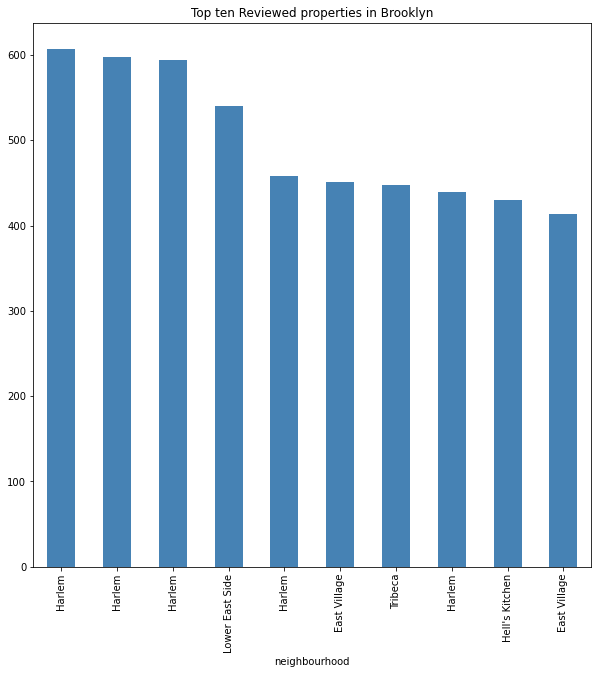

In [45]:
Manhattan10_sorted_desc= top_manhattan.sort_values('number_of_reviews',ascending=False)
pd_barplot = Manhattan10_sorted_desc[["neighbourhood", 'number_of_reviews']]
pd_barplot.plot(kind="bar", x='neighbourhood', title = 'Top ten Reviewed properties in Brooklyn', 
                    legend = False, figsize=(10,10), color='steelblue')